# Lab 4.01 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 1 - soft-drinks


The file softdrinks.xlsx categorizes 250 randomly 
selected consumers on the basis of their gender, their 
age, and their preference for our brand or a competitor's brand of a low-calorie soft drink. Use a chi-square test for independence to see whether the drink 
preference is independent of gender, and then whether 
it is independent of age.  First make a plot

Results of the main calculations:
- age vs preference
  - χ² ≈ 3.8589  
  - p-value = 0.2771
  - We do not reject H0


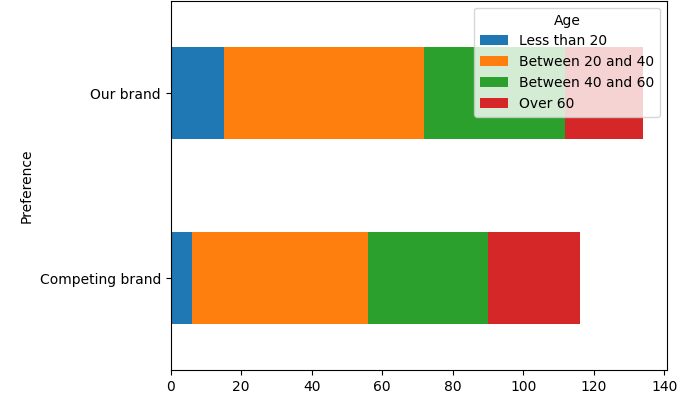



- gender vs preference
  - χ² ≈ 1.4078 
  - p-value = 0.2354
  - We do not reject H0

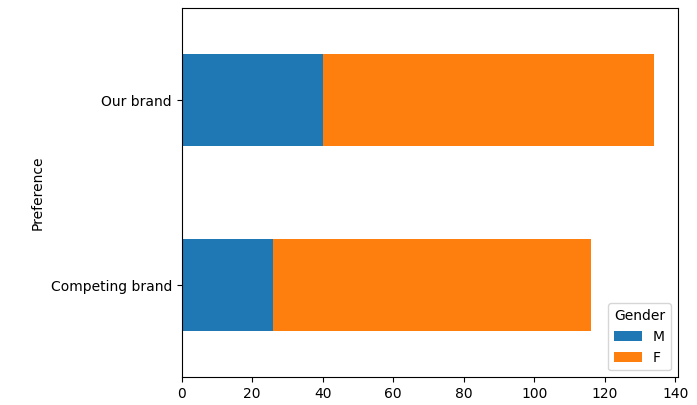

In [20]:
softdrinks = pd.read_csv('../data/Softdrinks.csv', sep=";", index_col=0)#.set_index('Consumer')
softdrinks.head()

,Gender,Age,Preference
Consumer,,,
1,F,Over 60,Our brand
2,F,Between 40 and 60,Our brand
3,M,Between 40 and 60,Our brand
4,F,Over 60,Competing brand
5,M,Between 20 and 40,Our brand


### Gender vs Brand

In [13]:
gender_brand = pd.crosstab(softdrinks.Preference, softdrinks.Gender)
gender_brand

Gender,F,M
Preference,,
Competing brand,90,26
Our brand,94,40


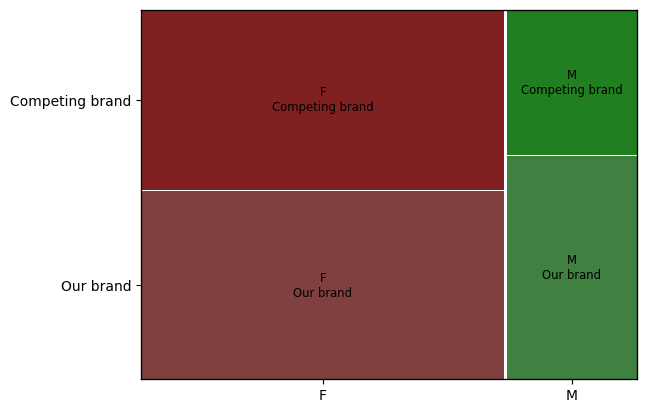

In [9]:
mosaic(data=softdrinks, index=['Gender', 'Preference']);

In [14]:
row_sums = gender_brand.sum(axis=1)
col_sums = gender_brand.sum()
n = row_sums.sum()

expected = np.outer(row_sums, col_sums) / n
expected

array([[85.376, 30.624],
       [98.624, 35.376]])

In [15]:
diffs = (expected - gender_brand)**2 / expected
print(diffs)

Gender                  F         M
Preference                         
Competing brand  0.250438  0.698190
Our brand        0.216797  0.604403


In [17]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

dof = min(gender_brand.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v) #geen reden om verband te verwachten :)

χ² ≈ 1.770
0.0841386541667046


In [23]:
# chi2, p, df, expected = stats.chi2_contingency(gender_brand, correction=False) #NOTE Veer zelfde uitkomst als die hierboven bij 2x2 crosstab
chi2, p, df, expected = stats.chi2_contingency(gender_brand)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p) #geen reden tot verwerpen licht boven elke redelijke alpha

Chi-squared       : 1.4078
Degrees of freedom: 1
P-value           : 0.2354


### Age vs Brand

In [26]:
Age_brand = pd.crosstab(softdrinks.Preference, softdrinks.Age)
Age_brand

Age,Between 20 and 40,Between 40 and 60,Less than 20,Over 60
Preference,,,,
Competing brand,50,34,6,26
Our brand,57,40,15,22


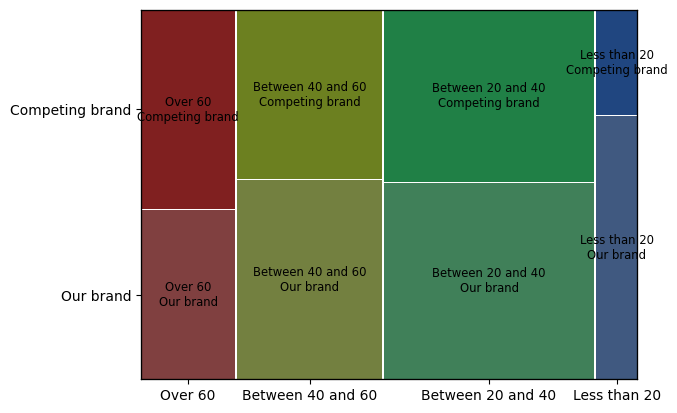

In [27]:
mosaic(data=softdrinks, index=['Age', 'Preference']);

In [29]:
chi2, p, df, expected = stats.chi2_contingency(Age_brand)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p) #hoger dan 0.05 dus verwerp NIET

Chi-squared       : 3.8589
Degrees of freedom: 3
P-value           : 0.2771
